# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import random
import re
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import binarize
from sklearn.ensemble import RandomForestClassifier

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [638]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist') # 53MB .mat file downloaded to data_home
X, Y = mnist.data, mnist.target

In [639]:
# EXPERIMENT CELL: Check out the data to get familiar
# print len(X), len(Y), X.shape, Y.shape

In [640]:
# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

In [641]:
# EXPERIMENT CELL: Figure out how to get indexes of interest
# type(Y)
# vals = np.where(Y == 0)[0]
# len(vals)
# print Y[vals[0]], Y[vals[len(vals)/2]]
# print random.sample(vals, 10)
# print Y[30978], Y[23997]

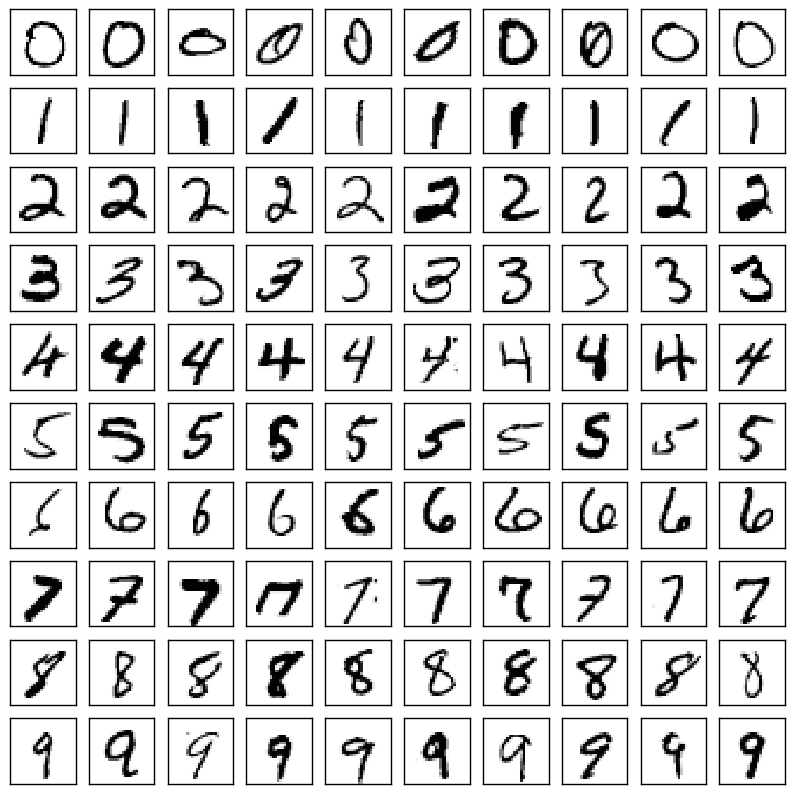

In [661]:
def P1(num_examples=10):
# References:
#   numpy_matplotlib_examples.ipynb

    # Initialize a new plot and set the size large enough so we can see each image.
    num_digits = 10 # number of digits
    plt.figure(figsize=(num_digits, num_examples))

    # Set a black on white colormap.
    plt.rc('image', cmap='Greys', interpolation='none')

    count = 0
    for digit in range(num_digits):
        # randomly chose width index values from Y where value equals digit
        ind_vals = random.sample(np.where(Y == digit)[0], num_examples)
        for index in range(num_examples):
            ax = plt.subplot(num_digits, num_examples, count + 1)
            plt.setp(ax, xticks=(), yticks=())    
            #plt.imshow(np.random.randn(28 * 28, 1).reshape(28, 28))
            plt.imshow(X[ind_vals[index]].reshape(28, 28))
            count += 1

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [662]:
def P2(k_values):
# References:
#   Nearest_Neighbors_with_questions__solution.ipynb
#   http://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/

    for k in k_values:
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(mini_train_data, mini_train_labels)
        preds = neigh.predict(dev_data)    
        print "k =", k, "; accuracy (L1):", np.mean(preds == dev_labels)

    neigh_k1 = KNeighborsClassifier(n_neighbors=1)
    neigh_k1.fit(mini_train_data, mini_train_labels)
    predicted = neigh_k1.predict(dev_data)
    expected = dev_labels
    report = classification_report(expected, predicted)

    # precision - number of positive predictions divided by the total number of positive class values predicted
    # recall - number of positive predictions divided by the number of positive class values in the test data
    # f1 - conveys the balance between the precision and the recall
    print("\nClassification report for classifier %s:\n%s\n" % (neigh_k1, report))
    
    p = re.compile('\d+\.\d+\s+\d+\.\d+\s+\d+\.\d+\s+\d+\.\d+')
    f1scores = [(float(a.split()[0]), float(a.split()[3])) for a in p.findall(report)]
    min_tup = min(f1scores, key = lambda t: t[1])
    print("Digit with min f1-score: %s scored %s\n" % (min_tup[0], min_tup[1]))

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k = 1 ; accuracy (L1): 0.888
k = 3 ; accuracy (L1): 0.878
k = 5 ; accuracy (L1): 0.869
k = 7 ; accuracy (L1): 0.865
k = 9 ; accuracy (L1): 0.863

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000


Digit with m

ANSWER: 

The 9 digit scored the lowest with 0.8 f1-score given a KNeighborsClassifier trained on the mini_train_data using the minkowski metric and a k of 1.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [663]:
def P3(train_sizes, accuracies):

    # choose the timer; use time.time for non-windows machines
    default_timer = time.time

    for t in train_sizes:
        # build sample training set given size t
        ind_vals = np.random.choice(np.arange(len(train_labels)), t, replace=False)
        sample_data = train_data[ind_vals]
        sample_labels = train_labels[ind_vals]
        # set classifer with k=1
        neigh = KNeighborsClassifier(n_neighbors=1)
        # fit using the sampled training set
        neigh.fit(sample_data, sample_labels)
        # check and time prediction performance using dev_data
        start = default_timer()
        preds = neigh.predict(dev_data) 
        finish = default_timer()
        # display accuracy and time for the prediction calculation
        acc = np.mean(preds == dev_labels)
        accuracies.append(acc)
        print "training set size =", t, "; accuracy (L1):", acc, "; time(s) =", (finish - start)

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = [] 
P3(train_sizes, accuracies)

training set size = 100 ; accuracy (L1): 0.702 ; time(s) = 0.160318851471
training set size = 200 ; accuracy (L1): 0.77 ; time(s) = 0.305716991425
training set size = 400 ; accuracy (L1): 0.812 ; time(s) = 0.61904001236
training set size = 800 ; accuracy (L1): 0.874 ; time(s) = 1.76374101639
training set size = 1600 ; accuracy (L1): 0.919 ; time(s) = 4.20393896103
training set size = 3200 ; accuracy (L1): 0.915 ; time(s) = 8.02573013306
training set size = 6400 ; accuracy (L1): 0.943 ; time(s) = 14.0313689709
training set size = 12800 ; accuracy (L1): 0.955 ; time(s) = 26.6230978966
training set size = 25000 ; accuracy (L1): 0.968 ; time(s) = 54.0291559696


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

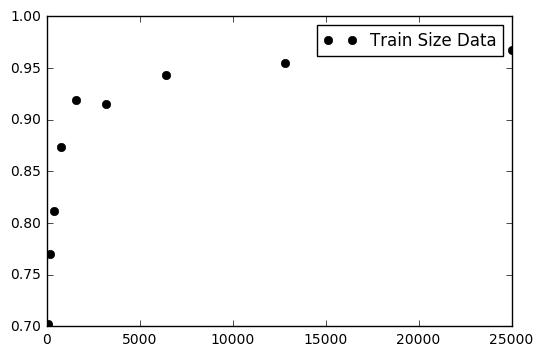

In [664]:
# EXPERIMENT CELL: Plot the data and consider options for processing
ts = train_sizes
a = accuracies

plt.figure()
plt.plot(ts, a, 'ko', label="Train Size Data")
plt.legend()
plt.show()

# Data looks like a logistic curve or inverse exponential. Perhaps a curve fit to either of those non-linear
# equations would make more sense. 

1 degree polynomial prediction for 60,000: [ 1.26287081]
2 degree polynomial prediction for 60,000: [-0.43765219]
3 degree polynomial prediction for 60,000: [ 14.35032306]
4 degree polynomial prediction for 60,000: [-238.0324311]


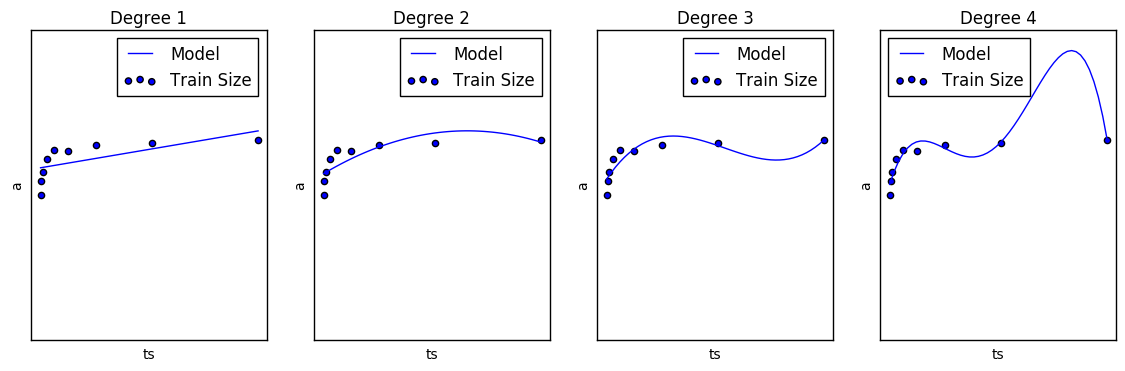

In [665]:
def P4():
# References:
#   Tutorial.ipynb

    # Below, we'll fit polynomials to the noisy data with these degrees.
    degrees = [1, 2, 3, 4]

    # Initialize a new plot.
    plt.figure(figsize=(14, 4))

    # use the train_sizes and accuracies from P3
    #print train_sizes
    #print accuracies
    
    # transpose train_sizes into a matrix
    ts = np.array([train_sizes]).T
    a = accuracies

    # We'll create a subplot for each value of the degrees list.
    for i in range(len(degrees)):
        # The subplots are all on the same row.
        ax = plt.subplot(1, len(degrees), i+1)
    
        # Turn off tick marks to keep things clean.
        plt.setp(ax, xticks=(), yticks=())

        # Set up the polynomial features preprocessor.
        polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)

        # Use the sklearn's Pipeline to string together 2 operations.
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

        pipeline.fit(ts, a)
    
        # Take the max and min from the X set
        ts_test = np.linspace(100, 25000)
        plt.plot(ts_test, pipeline.predict(ts_test[:, np.newaxis]), label="Model")

        # Output accuracy value predicted for 60000
        print '%s degree polynomial prediction for 60,000: %s' % (i+1, pipeline.predict([[60000]]))

        # Show the original training size data
        plt.scatter(ts, a, label="Train Size")

        # Add a few more labels to the plot.
        plt.xlabel("ts")
        plt.ylabel("a")
        plt.xlim((-1000, 26000))
        plt.ylim((0, 1.5))
        plt.legend(loc="best")
        plt.title("Degree %d" % degrees[i])

    # Render the plots.
    plt.show()
    
P4()

[ 1.  1.]


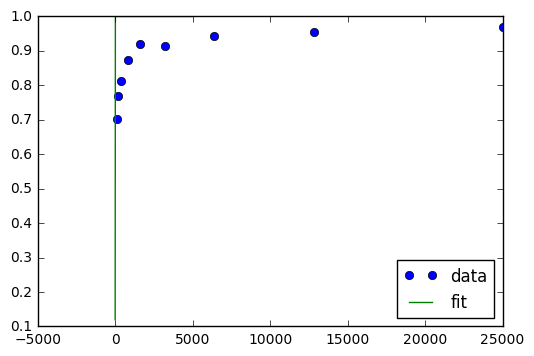

In [666]:
# EXPERIMENT CELL: Attempt at doing a curve fit - not complete

import numpy as np
import pylab
from scipy.optimize import curve_fit

def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y

xdata = np.array(train_sizes)
ydata = np.array(accuracies)

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print popt

x = np.linspace(-1, 5000, 10000, 25000)
y = sigmoid(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.legend(loc='best')
pylab.show()

ANSWER: 

A linear polynomial appears to have the best predication answer at 1.26964536 for a 60,000 training set. This not a useful answer as we would expect the accuracy predicted for 60,000 to be close to 1.0 as a maximum. The other three linear regression models were further out of reach for predicted accuracies. 

An initial viewing of the plotted train_sizes and accuracies shows a nonlinear plot. Perhaps a nonlinear regression would be more suitable given the nature of the data. 

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion matrix for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'):
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]

4 was confused with 9 the most with a false score of 14

Predicted a 9.0;
Predicted a 9.0;
Predicted a 9.0;
Predicted a 9.0;
Predicted a 9.0;


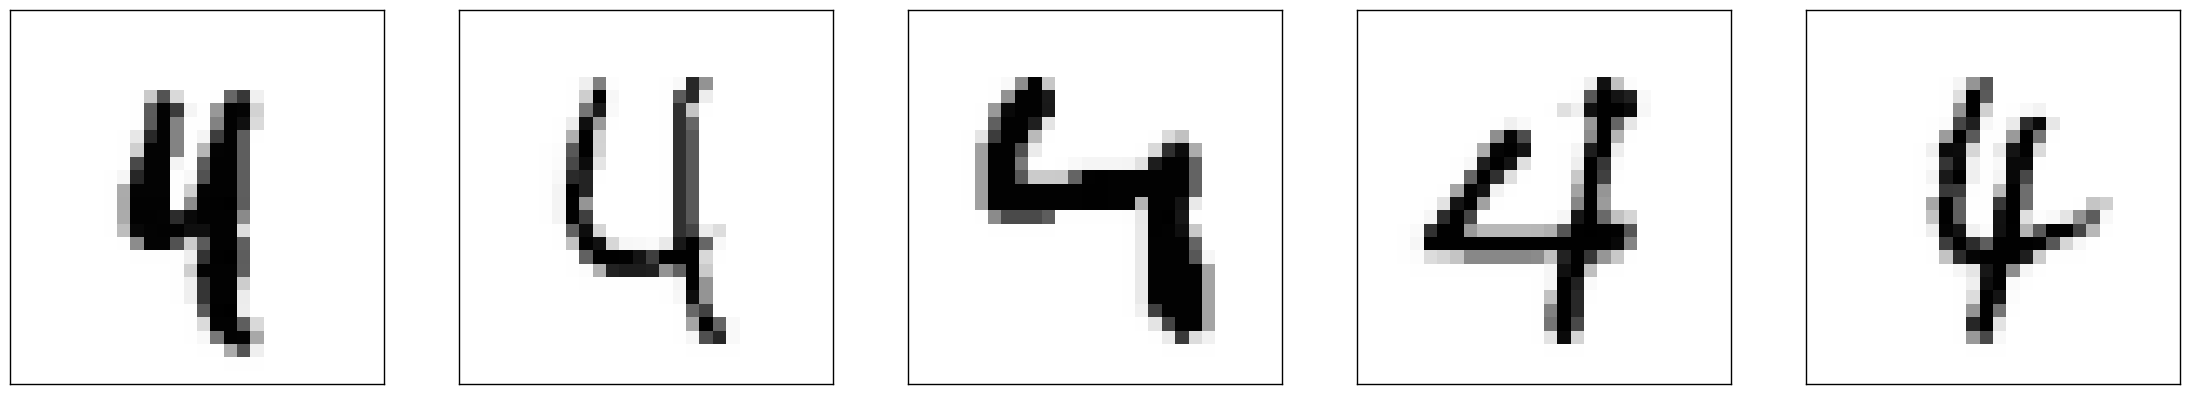

In [667]:
def P5():
    
    # designate 1-NN for the classifer
    neigh_k1 = KNeighborsClassifier(n_neighbors=1)
    # fit to the training data 
    neigh_k1.fit(mini_train_data, mini_train_labels)
    # get the predictions on the dev_data noting it will likely take over a minute on the full training data   
    predicted = neigh_k1.predict(dev_data)
    #print len(predicted), predicted
    expected = dev_labels
    # output the confusion matrix (actual = rows, predicted = columns)
    cm = confusion_matrix(expected, predicted)
    print("Confusion matrix for classifier %s:\n%s\n" % (neigh_k1, cm))
    
    # pick the most confused pair in the matrix (max value not on diameter)
    filled_cm = cm
    np.fill_diagonal(cm, 0)
    # rows are the actual numbers and columns are the predicted
    r,c = np.unravel_index(filled_cm.argmax(), filled_cm.shape)
    print ('%s was confused with %s the most with a false score of %s\n' % (r, c, filled_cm[r,c]))
    
    # find the index values of the most confused digit pair
    expected_l = expected.tolist()
    predicted_l = predicted.tolist()
    
    # get the indexes where r was expected but c was predicted
    indexes = [i for i,x in enumerate(expected_l) if (x == r and predicted_l[i] == c)]
    # choose samples of the r,c mismatch to display
    if len(indexes) < 5:
        samp_num = len(indexes)
    else:
        samp_num = 5
    ind_vals = random.sample(indexes, samp_num)
    #print ind_vals
    
    #num_digits = 10 # number of digits
    plt.figure(figsize=(28,28))

    # Set a black on white colormap.
    plt.rc('image', cmap='Greys', interpolation='none')
    
    count = 0
    for index in range(samp_num):
        ax = plt.subplot(1, samp_num, count + 1)
        plt.setp(ax, xticks=(), yticks=())    
        #plt.imshow(np.random.randn(28 * 28, 1).reshape(28, 28))
        plt.imshow(dev_data[ind_vals[index]].reshape(28, 28))
        print 'Predicted a %s;' % predicted_l[ind_vals[index]]
        count += 1

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [668]:
#EXPERIMENT CELL: Play with options for how to use convolve and kernels
# References: 
#   http://stackoverflow.com/questions/14765891/image-smoothing-in-python

#def GaussianKernel(v1, v2, sigma):
#    return exp(-norm(v1-v2, 2)**2/(2.*sigma**2))
#
#im = np.copy(dev_data[0])
#
#t = 1 - np.abs(np.linspace(-1, 1, 28))
#kernel = t.reshape(28, 1) * t.reshape(1, 28)
#kernel /= kernel.sum()   # kernel should sum to 1!  :)
##print kernel
#
#im2 = im.reshape(28, 28)
#print im2.shape
#print kernel.shape
##r = scipy.signal.convolve(im2, kernel, mode='same')
#print r.shape
#
#plt.figure(figsize=(10, 10))
#
## Set a black on white colormap.
#plt.rc('image', cmap='Greys', interpolation='none')
#
#ax = plt.subplot(1, 2, 1)
#plt.setp(ax, xticks=(), yticks=()) 
#plt.imshow(im.reshape(28, 28))
#ax = plt.subplot(1, 2, 2)
#plt.setp(ax, xticks=(), yticks=()) 
#plt.imshow(im2)
#plt.show()

In [677]:
default_timer = time.time

# walk through the image ignoring the edge to keep this simple; the edge should be included in the future
def simple_smoothing(img_blurred):
    img = np.copy(img_blurred) # working the smoothing off the original values for this function
    for i in range(1,len(img[:])-1):
        for j in range (1, len(img[:,:])-1):
            img_blurred[i,j] = np.average(img[i-1:i+2, j-1:j+2])

# WARNING: preprocessing the entire data set make take up to 30 minutes
def P6():
# Time to complete dev: ~5hrs

    # smooth the entire data set; this will take some time
    for item in X_blurred:
        simple_smoothing(item.reshape(28,28))
    
# make a copy of the of the entire data set 
X_blurred = np.copy(X)

start = default_timer()
P6()
finish = default_timer()
print finish-start

# divide the smoothed data set to match the original for test, dev, train, and mini data sets
test_data_blurred = X_blurred[61000:]
dev_data_blurred = X_blurred[60000:61000]
train_data_blurred = X_blurred[:60000]
mini_train_data_blurred = X_blurred[:1000]

1389.17826891


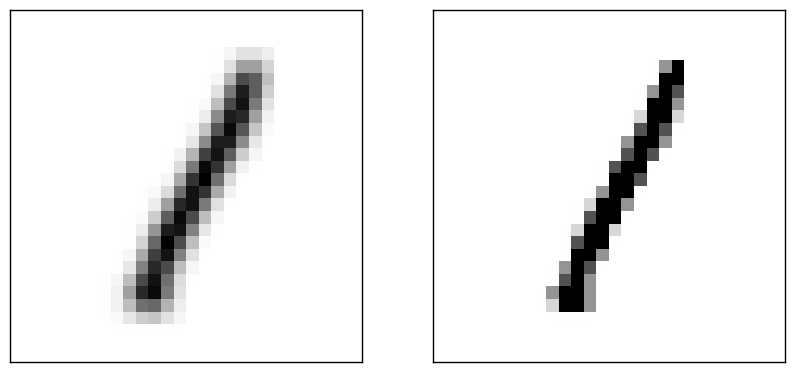

In [678]:
# show example of a smoothed digit
plt.figure(figsize=(10, 10))
plt.rc('image', cmap='Greys', interpolation='none')

ax = plt.subplot(1, 2, 1)
plt.setp(ax, xticks=(), yticks=()) 
plt.imshow(mini_train_data_blurred[0].reshape(28,28))
ax = plt.subplot(1, 2, 2)
plt.setp(ax, xticks=(), yticks=()) 
plt.imshow(mini_train_data[0].reshape(28,28))
plt.show()

ANSWER: 

Note that the smoothing function isn't the most efficient. I chose to do a complete copy of the data set and smooth it for use. This takes approximately 30 minutes to execute on my laptop. There are likely far better ways to due this. 

However, after the processing is completed, there is a blurred version of the test, dev, train, and mini_train data sets for experimenting with.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [679]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

def P7():
# References:
#   Naive_Bayes_sklearn_practice_solutions.ipynb

    # bernoulli
    for bin in frange(np.min(train_data), np.max(train_data), 0.1):
        bern = BernoulliNB(binarize=bin)
        bern.fit(train_data, train_labels)
        print 'binarize:', bin, 'bernoulli accuracy: %3.2f' %bern.score(dev_data, dev_labels)

    # gaussian
    gau = GaussianNB()
    gau.fit(train_data, train_labels)
    print 'gaussian accuracy: %3.2f' %gau.score(dev_data, dev_labels)

    # multinomial 
    mult = MultinomialNB()
    # create bins for white, gray, and black
    bins = np.array([0.2, 0.8, 1])
    mult.fit(np.digitize(train_data, bins), train_labels)
    print 'multinomial accuracy: %3.2f' %mult.score(np.digitize(dev_data, bins), dev_labels)

P7()

binarize: 0.0 bernoulli accuracy: 0.83
binarize: 0.1 bernoulli accuracy: 0.84
binarize: 0.2 bernoulli accuracy: 0.83
binarize: 0.3 bernoulli accuracy: 0.84
binarize: 0.4 bernoulli accuracy: 0.84
binarize: 0.5 bernoulli accuracy: 0.84
binarize: 0.6 bernoulli accuracy: 0.84
binarize: 0.7 bernoulli accuracy: 0.83
binarize: 0.8 bernoulli accuracy: 0.83
binarize: 0.9 bernoulli accuracy: 0.82
binarize: 1.0 bernoulli accuracy: 0.31
gaussian accuracy: 0.57
multinomial accuracy: 0.82


ANSWER: 

The MultinomialNB performs as well as the best BernoulliNB classifer. This remained the case when adjusting the binning ranges for the MultinomialNB. The Multinomial classifier represents the occurance of events - in this case there are three categories of information representing white, gray, and black used to determine what the digit is. 

Despite the additional category, over the binary representation in the Bernoulli, the classifier did not perform better. Creating more categories did not help the classifer either; the accuracy decreased to ~0.5 when increasing to five categories. The pixel information isn't necessarily discrete given the gray scale. 

Creating three categories, versus the two for Bernoulli, did not provide enough unique information to improve accuracy. I will be looking into a better way to explain this; it is my attempt at explaining in a way I can internalize.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [680]:
def P8(alphas):
# References:
#   Naive_Bayes_sklearn_practice_solutions.ipynb
#   http://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/
#   http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#   http://cs.stackexchange.com/questions/3005/smoothing-in-naive-bayes-model

    # 0.5 was chosen based on P7()
    bern = BernoulliNB(binarize=0.5)
    grid = GridSearchCV(estimator=bern, param_grid=alphas)
    start = time.time()
    grid.fit(train_data, train_labels)

    # summarize the results of the grid search
    print "GridSearchCV took %.2f seconds for %d candidate parameter settings.\n" % (time.time() - start, len(alphas))
    print "Best alpha score: %s" % grid.best_score_
    print "Best estimator param value: %s\n" % grid.best_estimator_.alpha
    print "Grid scores: %s" % grid.grid_scores_

    return grid

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

GridSearchCV took 75.47 seconds for 1 candidate parameter settings.

Best alpha score: 0.8369
Best estimator param value: 0.0001

Grid scores: [mean: 0.09892, std: 0.00002, params: {'alpha': 0.0}, mean: 0.83690, std: 0.00270, params: {'alpha': 0.0001}, mean: 0.83670, std: 0.00266, params: {'alpha': 0.001}, mean: 0.83652, std: 0.00268, params: {'alpha': 0.01}, mean: 0.83615, std: 0.00274, params: {'alpha': 0.1}, mean: 0.83543, std: 0.00269, params: {'alpha': 0.5}, mean: 0.83505, std: 0.00284, params: {'alpha': 1.0}, mean: 0.83452, std: 0.00293, params: {'alpha': 2.0}, mean: 0.83245, std: 0.00271, params: {'alpha': 10.0}]


In [681]:
print nb.best_params_

{'alpha': 0.0001}


ANSWER: 

The alpha of 0.0001 performed the best with a score of 0.8373 when using BernoulliNB classifier in GridSearchCV. The alpha for 0 had a score of 0.09848. From what I understand, an alpha of 0 indicates no smoothing which allows handling of cases that didn't appear in the training data set and prevents zero probabilities. 

Given  smoothing isn't applied with an alpha of zero, it may be expected that the score is practically zero. However, it is unclear to me as to why the score is zero for the BernoulliNB that binarizes the data.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [696]:
def P9():

    gau = GaussianNB()
    gau.fit(train_data, train_labels)
    print 'gaussian accuracy: %f\n' %gau.score(dev_data, dev_labels)
    
    # probability of each class
    #print gau.class_prior_
    # number of training samples observed in each class
    #print gau.class_count_
    # mean of each feature per class
    #print gau.theta_
    # variance of each feature per class
    #print gau.sigma_
    
    #print gau.sigma_[0]
    #gau.theta_ += 0.02
    gau.sigma_ += 0.023
    #print gau.sigma_[0]
    
    print 'gaussian accuracy after increasing sigma_ by 0.023: %f\n' %gau.score(dev_data, dev_labels)
    
    return gau

gnb = P9()

gaussian accuracy: 0.571000

gaussian accuracy after increasing sigma_ by 0.023: 0.812000



ANSWER: 

The hints referred to adjusting the theta_ and sigma_ values for the GaussianNB. In just manually scaling the theta_ and sigma_ values, just increasing the values of sigma_ by 0.02 brought the accuracy of the GaussianNB fitted to the train_data up to 0.812 which is close to BernoulliNB of 0.83. 

Why would simply scaling the variance, and not the mean, for the 784 features within the 10 classes greatly increase the score? I would wager that scaling the variance without modification of the mean increased discrimination between classes such that the classifier could more accurately model a 0 versus a 3 for instance.

Could we discuss this again in class?

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

binarize: 0.5 alpha: 0.0001 bernoulli accuracy: 0.85


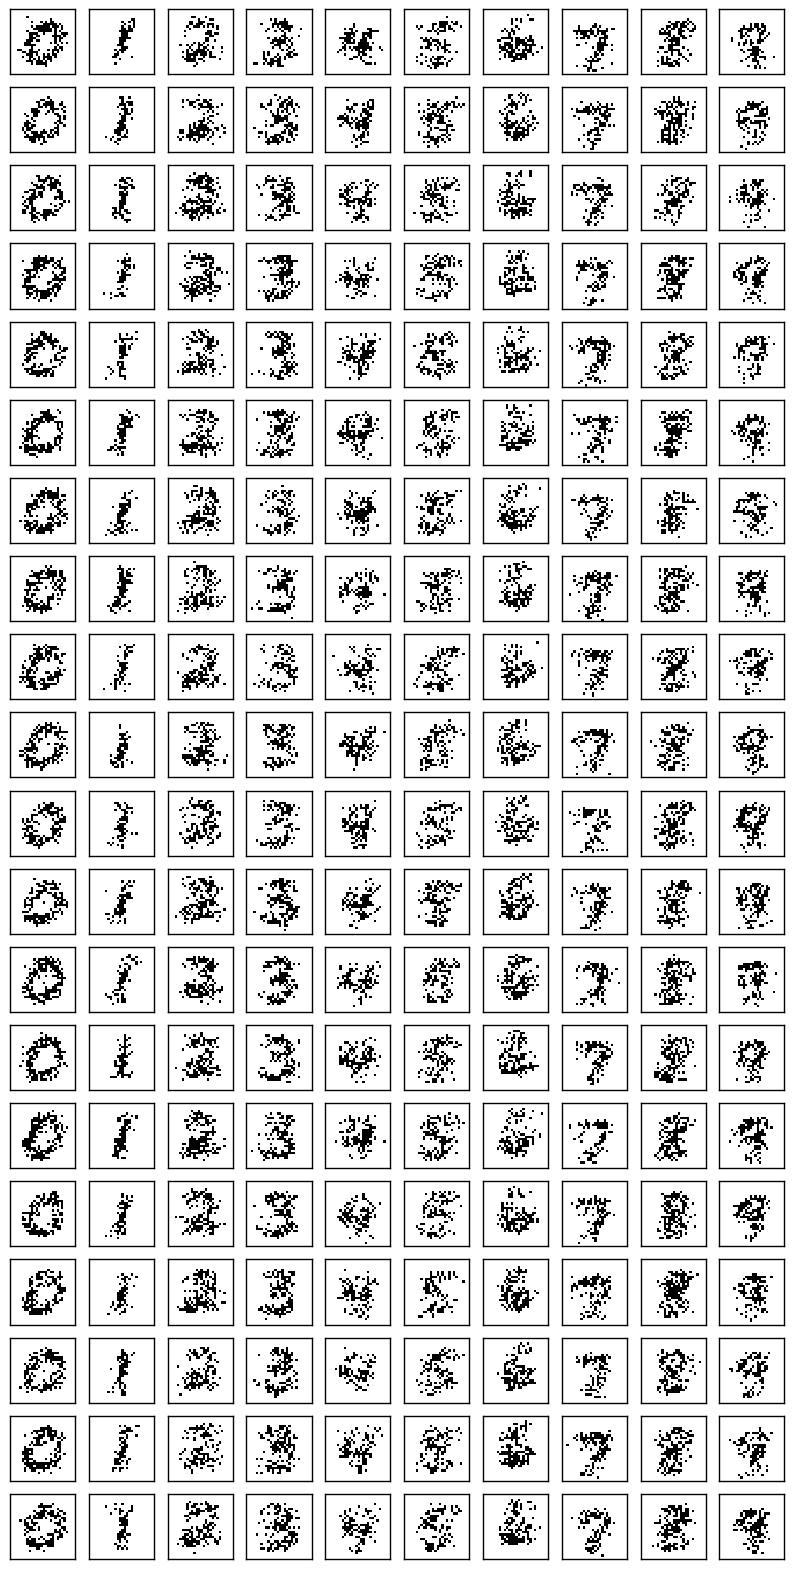

In [687]:
def P10(num_examples):

    # Initialize a new plot and set the size large enough so we can see each image
    num_digits = 10 # number of digits
    plt.figure(num=None, figsize=(num_digits, num_examples), dpi=100, facecolor='w', edgecolor='k')
    
    # Set a black on white colormap
    plt.rc('image', cmap='Greys', interpolation='none')

    bern = BernoulliNB(binarize=0.5, alpha=0.0001)
    bern.fit(train_data, train_labels)
    print 'binarize:', 0.5, 'alpha:', 0.0001, 'bernoulli accuracy: %3.2f' %bern.score(dev_data, dev_labels)

    # Calculate and output the 10x20 grid of 20 digit examples
    count = 0
    for e_idx in range(num_examples):
        for d_idx in range(num_digits):
            ax = plt.subplot(num_examples, num_digits, count + 1)
            plt.setp(ax, xticks=(), yticks=()) 
            # Set the uniform random values to determine pixel on/off
            rand_vals = np.random.rand(784)
            # Convert the logistic probability values
            feature_probs = np.exp(bern.feature_log_prob_[d_idx])
            # Determine the black/white pixel values given the Bernoulli model
            pixelized_vals = (rand_vals < feature_probs).astype(int)
            plt.imshow(pixelized_vals.reshape(28, 28))
            count += 1

P10(20)

ANSWER:

The generated digit representations are far more pixelated than the training images. First, the pixel values are limited to 0 and 1 (black and white). Second, the Bernoulli training model provided the confidences of a pixel being a certain digit or not. Note that each image above looks like a scatter plot of an actual digit. Given the uniform distribution used to determine on/off for the pixel, the most confident of values are evident in the images. The 9 and 4 digits looks the most fuzzy relative to the others.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [688]:
def P11(buckets, correct, total):

    bern = BernoulliNB(binarize=0.5, alpha=0.0001)
    bern.fit(train_data, train_labels)
    print 'binarize: ', 0.5, 'alpha:', 0.0001, 'bernoulli accuracy: %3.2f' %bern.score(dev_data, dev_labels)
    
    d_idx = 0
    for d in dev_data:
        pred_max = np.max(bern.predict_proba(d.reshape(1, 784)))
        pred_val = np.argmax(bern.predict_proba(d.reshape(1, 784)))
        acc_val = dev_labels[d_idx]
        
        # increment the totals and corrects for each bucket
        for b_idx, b in enumerate(buckets):
            if pred_max >= b: 
                total[b_idx] += 1
                if pred_val == acc_val:
                    correct[b_idx] += 1
        d_idx += 1

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = float(correct[i]) / float(total[i])
    print 'p(pred) >= %.13f    total = %3d    correct = %3d    accuracy = %.3f' %(buckets[i], total[i], correct[i], accuracy)

binarize:  0.5 alpha: 0.0001 bernoulli accuracy: 0.85
p(pred) >= 0.5000000000000    total = 997    correct = 849    accuracy = 0.852
p(pred) >= 0.9000000000000    total = 957    correct = 826    accuracy = 0.863
p(pred) >= 0.9990000000000    total = 860    correct = 778    accuracy = 0.905
p(pred) >= 0.9999900000000    total = 785    correct = 730    accuracy = 0.930
p(pred) >= 0.9999999000000    total = 722    correct = 685    accuracy = 0.949
p(pred) >= 0.9999999990000    total = 652    correct = 624    accuracy = 0.957
p(pred) >= 0.9999999999900    total = 577    correct = 557    accuracy = 0.965
p(pred) >= 0.9999999999999    total = 496    correct = 482    accuracy = 0.972
p(pred) >= 1.0000000000000    total = 469    correct = 458    accuracy = 0.977


ANSWER: 

The confidence and accuracy values are displayed above. There appears to be a positive correlation between confidence and accuracy. As the confidence tightens, the accuracy improves from 0.852 to 0.977. This would infer weak calibration as the classifer is more accurate at 100% than 50% confident. However, I wouldn't say the classifier is strongly callibrated as the confidence does not predict accuracy - a 90% confidence does not equal a 90% accuracy. In the extreme case, 100% confidence yields 98% accuracy. The 100% confidence case may be close enough to say confidence predicts accuracy, but the 50% confidence is not.

Note the bucketing is presumed cumulative. Thus any confidence >= 0.5 goes in the 0.5 bucket - this includes a confidence of 0.9 for instance. 

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()